# Homework 6 - Machine Learning II


## Deadline: October 26th, at noon (12:00)

#### About this homework

In this homework, we will get familiar with the concepts of confusion matrix and imbalanced data. Furthermore, we will compare different classifiers. Before solving these tasks, please make sure that you have looked through the slides of Lecture 07.

#### General instructions

Please look up the general instructions about homeworks in the first homework.

#### Tracking your time

We will appreciate if you track your time spent on solving the homework and report it in the dedicated cells at the end of the homework. This is not compulsory and does not affect your grade in any way. The collected information will be used to improve future homeworks.

# Task 1. Confusion matrix   (1 point)

There is information about the predictions of two classifiers A and B in <code>predictions.csv</code> and the true labels (column 'Actual'). The labels indicate whether a patient had a disease (positive) or not (negative). Label 0 stands for no disease and label 1 stands for a disease.

**a. Build a confusion matrix for classifier A by substituting the ?? in the table given below with appropriate numbers.** <br>


In [1]:
import pandas as pd

#CODE TAKEN FROM : https://gist.github.com/Mlawrence95/f697aa939592fa3ef465c05821e1deed
def confusion_matrix(df: pd.DataFrame, col1: str, col2: str):
    """
    Given a dataframe with at least
    two categorical columns, create a 
    confusion matrix of the count of the columns
    cross-counts
    
    use like:
    
    >>> confusion_matrix(test_df, 'actual_label', 'predicted_label')
    """
    return (
            df
            .groupby([col1, col2])
            .size()
            .unstack(fill_value=0)
            )

In [2]:
# TODO
import pandas as pd
%matplotlib inline

df = pd.read_csv("predictions.csv", index_col="ID")
print("Shape:", df.shape)
df.head()  # Top 5 rows

Shape: (200, 3)


,A,B,Actual
ID,,,
1,0,1,1
2,0,0,1
3,1,0,0
4,0,1,1
5,1,1,1


In [3]:
confusion_matrix(df,'A','Actual')

Actual,0,1
A,,
0,35,32
1,65,68


| ACTUAL\PREDICTED | DISEASE (1)  | NO DISEASE (0)  | TOTAL  |
|------------------|--------------|-----------------|--------|
|    DISEASE (1)   |      35      |        32       |   67   |
|  NO DISEASE (0)  |      65      |        68       |   133  |
|        TOTAL     |      100     |        100      |   200  |

**b. Build a confusion matrix for classifier B by substituting the ?? in the table given below with appropriate numbers.** <br>


In [4]:
# TODO
confusion_matrix(df,'B','Actual')

Actual,0,1
B,,
0,78,47
1,22,53


| ACTUAL\PREDICTED | DISEASE (1)  | NO DISEASE (0)  | TOTAL  |
|------------------|--------------|-----------------|--------|
|    DISEASE (1)   |      78      |        47       |   125  |
|  NO DISEASE (0)  |      22      |        53       |   75   |
|        TOTAL     |      100     |        100      |   200  |

**c.  Write the formulas of accuracy, precision, recall using TP, FP, TN, FN notation.** <br>

$$accuracy=\frac{(TP + TN)}{(TP + TN + FP + FN)}$$

$$precision=\frac{TP}{TP + FP}$$

$$recall=\frac{TP}{TP + FN}$$

**d. For both classifiers A and B, calculate accuracy, precision, recall. For that use the confusion matrices from subtasks 1a and 1b.** <br>


In [5]:
# TODO

**<font color='red'>Accuracy of the classifier A:</font>** 0.515

**<font color='red'>Precision of the classifier A:</font>** 0.35

**<font color='red'>Recall of the classifier A:</font>** 0.52

**<font color='red'>Accuracy of the classifier B:</font>** 0.655

**<font color='red'>Precision of the classifier B:</font>** 0.78

**<font color='red'>Recall of the classifier B:</font>**0.624

**e. Interpret  the values of accuracy, precision, recall for classifier A. Under interpretation we mean that you should come up with a very easily understandable sentence that explains the measure and result in a clear way (that would be understandable to all). For example if we would get 0.87 as accuracy on this data, it can be interpreted in the following way: 87% of the patients were diagnosed correctly.**

**<font color='red'>Accuracy:</font>** 51% of patient where diagnosed correclty (that's a pretty bad results).

**<font color='red'>Precision:</font>** 35% of patient diagnosed sick were in reality sick. That's still a pretty bad results.

**<font color='red'>Recall:</font>** On all the patient who are actually sick, we have 52% who where predicted sick. That means that 48% are sick but weren't good predicted, and that's terrible.

**f. Are all measures agreeing on the best classifier or are there differences (if yes then where)? Which classifier do you think is better and why?**

**<font color='red'>Answer:</font>** All the measures agreeing on the fact that the best classifier is classifier B (espescially the accuracy, who is 35% for B vs 78% for B).

# Task 2.  Imbalanced dataset (1.5 points)

In this exercise, we are going to use a bank marketing dataset that was downloaded from the __[UCI website](https://archive.ics.uci.edu/ml/datasets/bank+marketing)__. The data is about direct marketing campaigns of a Portuguese bank. The marketing campaigns were based on phone calls. Often, more than one call to the same client was required, in order to determine whether the product (bank loan) would be taken (positive class '1') or not (negative class '0') by the given client. Suppose that the bank executives have asked you to build a classifier that would help them to predict the outcome of the campaign for new clients. <br>
You are given training data (<code>training.csv</code>) and two test datasets (<code>testing_1.csv</code> and <code>testing_2.csv</code>). The problem is that the training data are heavily imbalanced, with 95% of the instances reporting the negative outcome of the marketing campaign. You need to take this fact into account.

In [6]:
train =  pd.read_csv("training.csv")
test_1 =  pd.read_csv("testing_1.csv")
test_2 =  pd.read_csv("testing_2.csv")
#train.head()

**a. Count the number of negative outcomes and positive outcomes (column 'y') in training data.** <br>
Hint 1. You can use groupby and size()

In [7]:
# TODO
train.groupby("y").size()

y
0    950
1     50
dtype: int64

**<font color='red'>Count of negative outcomes (train):</font>** 950 <br>
**<font color='red'>Count of positive outcomes (train):</font>** 50 <br>

**b. Count the number of negative outcomes and positive outcomes (column 'y') in test dataset 1 and in test dataset 2.** <br>

In [8]:
# TODO
test_1.groupby("y").size()
#test_2.groupby("y").size()

y
0    237
1     13
dtype: int64

**<font color='red'>Count of negative outcomes (test 1):</font>** 237 <br>
**<font color='red'>Count of negative outcomes (test 2):</font>** 125 <br>
**<font color='red'>Count of positive outcomes (test 1):</font>** 13 <br>
**<font color='red'>Count of positive outcomes (test 2):</font>** 125 <br>

The decision tree and the random forest implementation in scikit-learn do not accept strings or categorical features. Implementation requires all features to be numerical. Thus, categorical values should be transformed into multiple binary features. This is called <b>one-hot-encoding</b>, where one binary (1/0) variable is introduced for each possible value of the categorical variable. For example, you might encode a column named 'color' with values ('red', 'green', 'blue') into 3 columns (color_red, color_green, color_blue) with binary values (value 1 if the category matches and 0 otherwise).

**c. It is better to encode the columns at the same time in training and test datasets. Therefore, let's join training and test sets into one dataFrame. Also, add an extra column to separate train and test datasets later.**

In [9]:
import numpy as np

train =  pd.read_csv("training.csv")
test_1 =  pd.read_csv("testing_1.csv")
test_2 =  pd.read_csv("testing_2.csv")

df1 = train.copy() 
df1['source'] = 'train'

df2 = test_1.copy() 
df2['source'] = 'test_1'

df3 = test_2.copy() 
df3['source'] = 'test_2'

# TODO
train.insert(19,"source",'train')
test_1.insert(19,"source",'test_1')
test_2.insert(19,"source",'test_2')

data = pd.concat([test_1,test_2,train])
data.head()
data.columns

Index(['Unnamed: 0', 'X', 'age', 'job', 'marital', 'education', 'default',
       'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'y', 'source'],
      dtype='object')

In [10]:
train.shape

(1000, 20)

**d. Find all columns with only 2 distinct values. Replace values 'yes' and 'no' by 1 and 0, respectively (1=yes, 0=no).**<br>
Hint 1. You can use map() function.

In [11]:
# TODO
# Column "loan" values changed to one-hot-encoding.
data.loan = data.loan.map(dict(yes=1, no=0))

# Add your code
data.default = data.default.map(dict(yes=1, no=0))
data.housing = data.housing.map(dict(yes=1, no=0))

data.head()

,Unnamed: 0,X,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,source
0,1,4280,49,self-employed,married,secondary,0,0,1,0,unknown,3,jun,51,9,-1,0,unknown,0,test_1
1,2,5455,77,retired,married,unknown,0,992,0,0,cellular,27,apr,147,2,182,2,failure,0,test_1
2,3,5119,31,technician,single,secondary,0,1447,1,0,cellular,21,nov,225,2,95,13,other,0,test_1
3,4,4461,35,management,married,secondary,0,1,1,0,unknown,29,may,246,2,-1,0,unknown,0,test_1
4,5,4722,58,technician,married,unknown,0,1617,1,0,cellular,5,feb,109,4,274,2,failure,0,test_1


**e. Change all categorical columns into binary features using one-hot-encoding and divide the dataFrame back into train, test_1 and test_2. Do not forget to remove the column 'source'.**<br>
Hint 1: You can use **pandas** function <code>get_dummies()</code> to change categorical columns into binary columns. You can specify columns, which you would like to encode (<code>pd.get_dummies(data, columns=[...])</code>), then the column 'source' that you added in 2c will not be encoded. We would like to note that sometimes some of the columns in train dataset may contain values, which do not exist in the test dataset. Therefore, <code>get_dummies()</code> will generate columns, which may not exist in test dataset if you use <code>get_dummies()</code> on train and test dataset separately. Thus, it was important to join data frames before using <code>get_dummies()</code>.<br>
Hint 2. One solution would be to select all object columns (strings) except the column 'source' using <code>data.select_dtypes()</code>. <br>
Hint 3. You can use <code>dataFrame.drop()</code> to remove columns.

In [12]:
# TODO
data_dum = pd.get_dummies(data,columns=['job', 'marital', 'education','balance', 'contact', 'month','poutcome'])
data_dum.head()

,Unnamed: 0,X,age,default,housing,loan,day,duration,campaign,pdays,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,1,4280,49,0,1,0,3,51,9,-1,...,1,0,0,0,0,0,0,0,0,1
1,2,5455,77,0,0,0,27,147,2,182,...,0,0,0,0,0,0,1,0,0,0
2,3,5119,31,0,1,0,21,225,2,95,...,0,0,0,1,0,0,0,1,0,0
3,4,4461,35,0,1,0,29,246,2,-1,...,0,0,1,0,0,0,0,0,0,1
4,5,4722,58,0,1,0,5,109,4,274,...,0,0,0,0,0,0,1,0,0,0


In [13]:
# TODO
train = data_dum[data_dum['source'] == 'train']
train = train.drop(columns = 'source')
test_1 = data_dum[data_dum['source'] == 'test_1']
test_1 = test_1.drop(columns = 'source')
test_2 = data_dum[data_dum['source'] == 'test_2']
test_2 = test_2.drop(columns = 'source')

#test_2.head()

**f. Create 6 different subsets from these three datasets (X_train, y_train, X_test_1, y_test_1, X_test_2, y_test_2). The X_train, X_test should have all features and not the outcome, whereas y_train and y_test should have only the outcome. The target value (outcome) is in the column 'y'.** <br>

In [14]:
# TODO
X_train = train.drop(columns = ['y'])
y_train = train['y']
X_test_1 = test_1.drop(columns = ['y'])
y_test_1 = test_1['y']
X_test_2 = test_2.drop(columns = ['y'])
y_test_2 = test_2['y']

**g. Train a random forest classifier using RandomForestClassifier from sklearn (set <code>n_estimators=100</code>, <code>max_depth=4</code> and <code>random_state=0</code>) and use sklearn <code>confusion_matrix()</code> to interpret the results. Apply it to both test datasets. Please write a short discussion (2-3 sentences) about how well the model is predicting.**

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

# TODO
rf = RandomForestClassifier(n_estimators=100,max_depth=4,random_state=0).fit(X_train, y_train)

In [16]:
y_pred = rf.predict(X_test_1)
confusion_matrix_result = confusion_matrix(y_test_1.values, y_pred, labels=[1,0])  # Label=[1,0], otherwise predicted and actual axes are swapped
print("Confusion matrix:\n%s" % confusion_matrix_result)

Confusion matrix:
[[  0  13]
 [  0 237]]


In [17]:
y_pred = rf.predict(X_test_2)
confusion_matrix_result = confusion_matrix(y_test_2.values, y_pred, labels=[1,0])
print("Confusion matrix:\n%s" % confusion_matrix_result)

Confusion matrix:
[[  0 125]
 [  0 125]]


**<font color='red'>Answer:</font>** The model :
- works very well for the negative outcomes
- don't work at all for the positive outcomes (all missclassified)
So, I can't see why but there is a lot of improvement to do in the prediction of positive outcomes.

**h. Use undersampling and create a balanced training dataset. Select all positive cases and randomly 50 negative cases. Show that your training dataset is balanced.**<br>
Hint 1. You can use dataFrame.sample()

In [18]:
# TODO

positive_cases = train[train['y'] == 1]
negative_sample = train[train['y'] == 0].sample(n=50, random_state=0)
train_balanced = pd.concat([positive_cases,negative_sample])
train_balanced.sort_index(inplace=True)

# split data into X and y
X_train_bal = train_balanced.drop(columns = ['y'])
y_train_bal = train_balanced['y']

### TODO show that your training dataset is balanced
y_train_bal.value_counts()

1    50
0    50
Name: y, dtype: int64

**i. Train a random forest classifier on the balanced training dataset. Use the same parameters as in 2e. Predict and use sklearn <code>confusion_matrix()</code> to interpret the results. Apply it to both test datasets. Please write a short discussion (2-3 sentences) about how well the model is predicting.**

In [19]:
# TODO
rf_model_balanced = RandomForestClassifier(n_estimators=100,max_depth=4,random_state=0).fit(X_train_bal, y_train_bal)

In [20]:
y_pred = rf_model_balanced.predict(X_test_1)
confusion_matrix_result_balanced = confusion_matrix(y_test_1.values, y_pred, labels=[1,0])
print("Confusion matrix:\n%s" % confusion_matrix_result_balanced)

Confusion matrix:
[[ 11   2]
 [ 78 159]]


In [21]:
y_pred = rf_model_balanced.predict(X_test_2)
confusion_matrix_result_balanced = confusion_matrix(y_test_2.values, y_pred, labels=[1,0])
print("Confusion matrix:\n%s" % confusion_matrix_result_balanced)

Confusion matrix:
[[104  21]
 [ 45  80]]


**<font color='red'>Answer:</font>** The model :
- the accuracy of the model is quite good (Test 1 = 68%, Test 2 = 73%)
- the precision of the model is quite random, so we can't judge just with 2 tests (Test 1 = 12%, Test 2 = 93%)
- the recall of the model is quite good also (Test 1 = 84%, Test 2 = 83%)
So, we can say that the model is now better than previous, but we can't judge the precision yet.

# Task 3. Comparing models  (1.5 points)

In this task, you are going to generate your own data and build several classifiers for it. The aim is to investigate how the models "look like". We will end up with something like __[this](http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html)__.
<br>

**a. First, generate the training data. The data will have 2 features $x_{1}$ and $x_{2}$ (x-coordinate and y-coordinate respectively) and a binary label. Generate 2 datasets: one with 20 data points and another with 500 data points. To generate a single data point, choose $x_{1}$ randomly (as a real number) from the range (-5, 5), and $x_{2}$ also randomly from the same range. As you already understood, these data are interpretable as 2-dimensional. Now assign labels to the data points, such that inside the circle defined with the formula $(x_1 - 0)^2 + (x_2 - 0)^2 = 3^2$ the points are positive (class 1), and outside the circle the points are negative (class 0).**<br>
Hint 1. You can use numpy random.uniform to generate $x_1$ and $x_2$ <br>
Hint 2. If $(x - center_x)^2 + (y - center_y)^2 < radius^2$ then the point is inside the circle.

In [22]:
# TODO
import numpy as np
import matplotlib.patches as patches

In [23]:
np.random.seed(6)  # To get comparable results.

# TODO generate 20 data points
x = np.random.uniform(-5,5,20)
y = np.random.uniform(-5,5,20)  # Note that here y, is not a class label (y is x2 in the text)

label = []
for i in range(0,20,1):
    if( ((x[i]-0)**2 + (y[i]-0)**2) < 3**2 ):  
        label.append(True)
    else:
        label.append(False)

data = pd.DataFrame({'x':x,'y':y,'label':label})
data['label'] = data['label'].astype(int) # True and False into 1 0
data.head()

## TODO same for 500 data points

x2 = np.random.uniform(-5,5,500)
y2 = np.random.uniform(-5,5,500)  # Note that here y, is not a class label (y is x2 in the text)

label_2 = []
for i in range(0,500,1):
    if( ((x2[i]-0)**2 + (y2[i]-0)**2) < 3**2 ):  
        label_2.append(True)
    else:
        label_2.append(False)

data2 = pd.DataFrame({'x2':x2,'y2':y2,'label':label_2})
data2['label'] = data2['label'].astype(int)
data2.head()


,x2,y2,label
0,2.465107,-0.798237,1
1,2.240706,1.341938,1
2,-0.938922,4.112954,0
3,4.893798,-3.455295,0
4,-0.495007,-2.088080,1


**b. Visualize all the training data that you generated on 2 scatter plots (one for 20 and another for 500 data points).**<br>
Hint 1: You can use the seaborn library and hue parameter to color both classes very easily<br>

You may get something like this (500 data points)
![title](dataset_2.jpg)

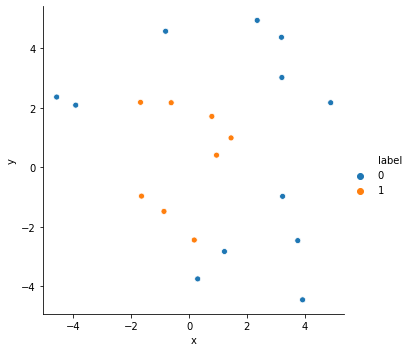

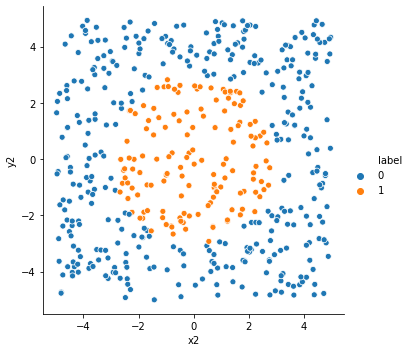

In [24]:
# TODO
import seaborn as sns
sns.relplot(
    data=data,
    x="x", y="y", hue="label"
)
sns.relplot(
    data=data2,
    x="x2", y="y2", hue="label"
)


**c. Now train 10 classifiers on these data using 5 different classification methods separately on both datasets (5 classification methods x 2 datasets = 10 classifiers)**<br>
1. Decision tree - Set <code>criterion='entropy'</code> and <code>random_state=0</code>.<br>
2. Random forest - Set <code>n_estimators=100</code>, <code>max_depth=4</code> and <code>random_state=0</code>.<br>
3. SVM I (linear) - Set <code>kernel='linear'</code>.<br>
4. SVM II (polynomial kernel with degree 2) - Set <code>kernel='poly'</code>, <code>degree=2</code> and <code>gamma='auto'</code>.<br>
5. SVM III (radial kernel) - Set <code>kernel='rbf'</code> and <code>gamma='auto'</code>.

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# TODO
dt_1 = DecisionTreeClassifier(criterion='entropy',random_state=0).fit(data[['x','y']], data['label'])
dt_2 = DecisionTreeClassifier(criterion='entropy',random_state=0).fit(data2[['x2','y2']], data2['label'])

rf_1 = RandomForestClassifier(n_estimators=100,max_depth=4,random_state=0).fit(data[['x','y']], data['label'])
rf_2 = RandomForestClassifier(n_estimators=100,max_depth=4,random_state=0).fit(data2[['x2','y2']], data2['label'])

svm_1 = SVC(kernel='linear').fit(data[['x','y']], data['label'])
svm_2 = SVC(kernel='linear').fit(data2[['x2','y2']], data2['label'])

svm_poly_1 = SVC(kernel='poly', degree=2,gamma='auto').fit(data[['x','y']], data['label'])
svm_poly_2 = SVC(kernel='poly', degree=2,gamma='auto').fit(data2[['x2','y2']], data2['label'])

svm_rbf_1 = SVC(kernel='rbf',gamma='auto').fit(data[['x','y']], data['label'])
svm_rbf_2 = SVC(kernel='rbf',gamma='auto').fit(data2[['x2','y2']], data2['label'])


**d. The aim is now to see which of the classification methods were able to learn the correct shape (circle) from the training data and predict class 1 for the points inside the circle and class 0 for other points (remember, the classifier has no information about the circle formula, it is just learning by the information given to it by the training data). To do that generate testing data from the same range but this time as a grid with a small step (for example 0.25 or even smaller). For every testing point, predict the label with all 10 classifiers and plot the results. Example of a perfectly recognized circular shape on a testing data (points generated to be on a grid) is shown below.**<br>
Hint 1. Look numpy.meshgrid.<br>
Hint 2. Some of the models may predict only one class. <br>
Hint 3. The 3rd argument of plt.subplot() is the index of the subplot, it positions the subplot to the main plot.

You may get something like this in case of radial kernel.
![title](radial.jpg)

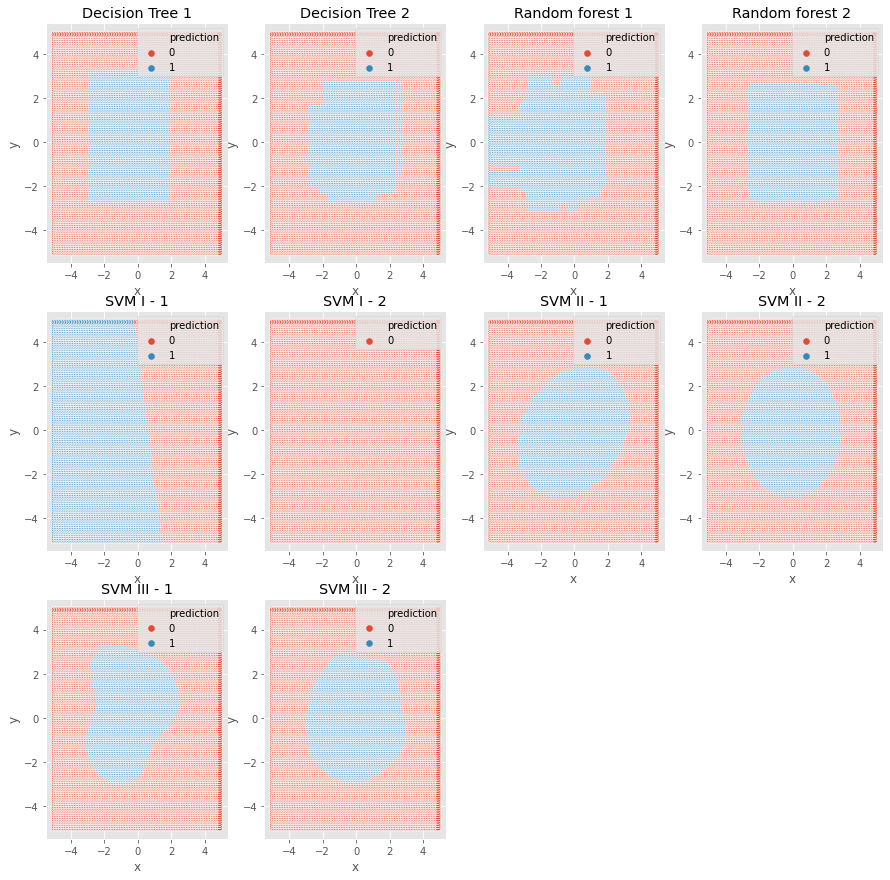

In [26]:
# TODO
from matplotlib import pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
x = np.arange(-5, 5, 0.1)
y = np.arange(-5, 5, 0.1)
xx, yy = np.meshgrid(x, y)
df = pd.DataFrame({'x':xx.flatten(),'y':yy.flatten()})

# Solution 1
# Decision tree with first dataset
plt.figure(figsize=(15,15))
df['prediction'] = dt_1.predict(df[['x','y']])
plt.subplot(3,4,1)  
plt.title('Decision Tree 1')
sns.scatterplot(
    data=df,
    x="x", y="y", hue="prediction"
)

# Decision tree with second dataset
df['prediction'] = dt_2.predict(df[['x','y']])
plt.subplot(3,4,2)  
plt.title('Decision Tree 2')
sns.scatterplot(
    data=df,
    x="x", y="y", hue="prediction"
)

##################################
df['prediction'] = rf_1.predict(df[['x','y']])
plt.subplot(3,4,3)  
plt.title('Random forest 1')
sns.scatterplot(
    data=df,
    x="x", y="y", hue="prediction"
)

df['prediction'] = rf_2.predict(df[['x','y']])
plt.subplot(3,4,4)  
plt.title('Random forest 2')
sns.scatterplot(
    data=df,
    x="x", y="y", hue="prediction"
)

##################################

df['prediction'] = svm_1.predict(df[['x','y']])
plt.subplot(3,4,5)  
plt.title('SVM I - 1')
sns.scatterplot(
    data=df,
    x="x", y="y", hue="prediction"
)

df['prediction'] = svm_2.predict(df[['x','y']])
plt.subplot(3,4,6)  
plt.title('SVM I - 2')
sns.scatterplot(
    data=df,
    x="x", y="y", hue="prediction"
)

##################################

df['prediction'] = svm_poly_1.predict(df[['x','y']])
plt.subplot(3,4,7)  
plt.title('SVM II - 1')
sns.scatterplot(
    data=df,
    x="x", y="y", hue="prediction"
)

df['prediction'] = svm_poly_2.predict(df[['x','y']])
plt.subplot(3,4,8)  
plt.title('SVM II - 2')
sns.scatterplot(
    data=df,
    x="x", y="y", hue="prediction"
)

##################################

df['prediction'] = svm_rbf_1.predict(df[['x','y']])
plt.subplot(3,4,9)  
plt.title('SVM III - 1')
sns.scatterplot(
    data=df,
    x="x", y="y", hue="prediction"
)

df['prediction'] = svm_rbf_2.predict(df[['x','y']])
plt.subplot(3,4,10)  
plt.title('SVM III - 2')
sns.scatterplot(
    data=df,
    x="x", y="y", hue="prediction"
)


**e. Interpret the results.**
- **Which classifiers were able to recognize the circular shape?**
- **How did different learning algorithms perform, are the results what you would have expected?**
- **Was the original training data size important and how did it influence the results?**

**<font color='red'>Answer:</font>** We can say :
- that the SVM II (Polynomial) is the classifier who was able to recognize the most the circular shape
- for the decision tree and random forest, theses models predict a square, who is quite understandable.
- for SVM I, the shape is really .. linear so this method wasn't suitable for this circular shape
- SVM III recognize some circular shape, but i didn't know why it's not perfectly circular
- finally, a big training data size is a little bit better, but not so much ; for SVM I it didn't worked at all, and for the other, i maybe prefer a perfect shape of square that a not defined shape than we can see in Random forest.

# Task B1 (OPTIONAL BONUS TASK). SVM model visualization  (1 point)

This task is a bonus task, meaning that you can earn bonus points that will be added to your homework, project and exam points. For example, if you get 89 points in total from homework, project and exam, but you have earned 2 bonus points from your homeworks, then you get the grade `A` because your final score will be 89+2=91.

Train an SVM on this toy dataset. Use the linear kernel <code>kernel='linear'</code>. Visualize the decision boundary with a black line and highlight all support vectors. Write out the equation of the decision boundary line. Additionally, draw two dashed lines which pass through the support vectors and are parallel to decision boundary - also called support vector lines. One of these lines must go through the positive support vectors and the other through negative support vectors.

Note that you should not split the data - meaning no need to make a train and a test split.

In [27]:
data = pd.DataFrame({
    'x1': [1,1,2,4,6,5,6,7,11,11],
    'x2': [1,3,5,2,6,9,1,6,3,7],
    'y':  [0,0,0,0,1,1,0,1,1,1]
})
data

,x1,x2,y
0,1,1,0
1,1,3,0
2,2,5,0
3,4,2,0
4,6,6,1
5,5,9,1
6,6,1,0
7,7,6,1
8,11,3,1
9,11,7,1


## <font color='red'>This was the last task! Please restart the kernel and run all before submission! (`Kernel -> Restart and Run All`)</font>

## Comments (voluntary):

Write comments about the homework here. For example, comment if You had difficulties with some exercises or you wish there were some other topics covered in the homework. In addition, comment if you found some task interesting or fascinating.

**<font color='red'>Comments:</font>** Sometimes, I found really hard what we are supposed to do (for example here, 2.e I spent much more time to understand what I should do than to do it). Same thing for the circle, I was really lost during a while, even now I'm not sure we should consider the center of the cercle as (0,0) or if it's an example. Maybe give an example is a good way to understand better. Otherwise, it's really interesting ! 

## How long did it take you to solve the homework?

Please answer as precisely as you can. It does not affect your points or grade in any way. It is okey, if it took 0.5 hours or 24 hours. Please count in astronomical hours (1 hour = 60 minutes) and not academic hours (1 hour = 45 minutes). The collected information will be used to improve future homeworks.
<font color = "red"><b> Please replace "X" with the amount of hours and don't change the unit "hours" or write any other text. </b></font>

**<font color='red'>Task 1 (please change X in the next cell into your estimate)</font>**

1 hours

**<font color='red'>Task 2 (please change X in the next cell into your estimate)</font>**

1.5 hours

**<font color='red'>Task 3 (please change X in the next cell into your estimate)</font>**

2 hours

**<font color='red'>Task B1 (please change X in the next cell into your estimate)</font>**

X hours

**<font color='red'>TOTAL (please change X in the next cell into your estimate)</font>**

X hours

**<font color='red'>THANK YOU FOR YOUR EFFORT!</font>**